<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests


result = requests.get(url)

In [0]:
result

<Response [200]>

In [0]:
type(result)

requests.models.Response

In [0]:
type(result.text)

str

In [0]:
soup = bs4.BeautifulSoup(result.text)
type(soup)

bs4.BeautifulSoup

In [0]:
soup.select('h2')

In [0]:
type(soup.select('h2'))

list

In [0]:
len(soup.select('h2'))

95

In [0]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2019/schedule/presentation/235/" id="presentation-235">
        5 Steps to Build Python Native GUI Widgets for BeeWare
      </a>
</h2>

In [0]:
type(first)

bs4.element.Tag

In [0]:
first.text

'\n\n        5 Steps to Build Python Native GUI Widgets for BeeWare\n      \n'

In [0]:
type(first.text)

str

In [0]:
first.text.strip()

'5 Steps to Build Python Native GUI Widgets for BeeWare'

In [0]:
last = soup.select('h2')[-1]
last.text.strip()

"Working with Time Zones: Everything You Wish You Didn't Need to Know"

In [0]:
for_titles = []
for tag in soup.select('h2'):
    for_titles.append(tag.text.strip())
for_titles

In [0]:
comp_titles = [tag.text.strip()
               for tag in soup.select('h2')]
for_titles == comp_titles

True

In [0]:
type(comp_titles), len(comp_titles)

(list, 95)

In [0]:
comp_titles[0], comp_titles[-1]

('5 Steps to Build Python Native GUI Widgets for BeeWare',
 "Working with Time Zones: Everything You Wish You Didn't Need to Know")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [0]:
long_titles = []
for title in for_titles:
    if len(title) > 80:
        long_titles.append(title)

long_titles

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 2. List Comprehension

In [0]:
[title for title in for_titles if len(title) > 80]

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 3. Filter with named function

In [0]:
def long(title):
    return len(title) > 80

long(long_titles[0])

True

### 4. Filter with anonymous function

In [0]:
titles = for_titles
list(filter(long, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

In [0]:
list(filter(lambda t: len(t) > 80, titles))

['¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks',
 'Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders',
 'How to engage Python contributors in the long term? Tech is easy, people are hard.',
 'Lessons learned from building a community of Python users among thousands of analysts',
 'Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting',
 'One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.',
 'Put down the deep learning: When not to use neural networks and what to do instead',
 'Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [0]:
import pandas as pd
pd.options.display.max_colwidth = 200

In [0]:
df = pd.DataFrame({'title': titles})
df.shape

(95, 1)

In [0]:
# Extract rows that meet logical criteria
df[ df['title'].str.len() > 80 ]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


In [0]:
df['title'].str.len()

In [0]:
# Using a mask on a DataFrame, similar to a SQL WHERE clause
condition = df['title'].str.len() > 80
df[condition]

,title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43,"How to engage Python contributors in the long term? Tech is easy, people are hard."
48,Lessons learned from building a community of Python users among thousands of analysts
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting"
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company."
66,Put down the deep learning: When not to use neural networks and what to do instead
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline


## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

In [0]:
df['title_length'] = df['title'].apply(len)
df.head()

,title,title_length
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54
1,8 things that happen at the dot: Attribute Access & Descriptors,64
2,Account Security Patterns: How Logged-In Are you?,49
3,Ace Your Technical Interview Using Python,41
4,Advanced asyncio: Solving Real-world Production Problems,56


In [0]:
df[ df['title_length'] > 80]

,title,title_length
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82
48,Lessons learned from building a community of Python users among thousands of analysts,85
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95
66,Put down the deep learning: When not to use neural networks and what to do instead,82
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90


In [0]:
df.loc[ df['title_length'] > 80, 'title']

30          ¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks
38                  Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders
43                 How to engage Python contributors in the long term? Tech is easy, people are hard.
48              Lessons learned from building a community of Python users among thousands of analysts
50                 Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting
60    One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.
66                 Put down the deep learning: When not to use neural networks and what to do instead
84         Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline
Name: title, dtype: object

### long title

In [0]:
df['long_title'] = df['title_length'] > 80
df.head()

,title,title_length,long_title
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False
2,Account Security Patterns: How Logged-In Are you?,49,False
3,Ace Your Technical Interview Using Python,41,False
4,Advanced asyncio: Solving Real-world Production Problems,56,False


In [0]:
df[ df['long_title'] == True]

,title,title_length,long_title
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True
38,Getting started with Deep Learning: Using Keras & Numpy to detect voice disorders,81,True
43,"How to engage Python contributors in the long term? Tech is easy, people are hard.",82,True
48,Lessons learned from building a community of Python users among thousands of analysts,85,True
50,"Life Is Better Painted Black, or: How to Stop Worrying and Embrace Auto-Formatting",82,True
60,"One Engineer, an API, and an MVP: Or, how I spent one hour improving hiring data at my company.",95,True
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True
84,Thinking Inside the Box: How Python Helped Us Adapt to An Existing Data Ingestion Pipeline,90,True


In [0]:
# Tilde operator is an inversion
df[~df['long_title']]

### first letter

In [0]:
df['first_letter'] = df['title'].str[0]

In [0]:
df[ df['first_letter'] == 'P' ]

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


In [0]:
# You can normalize this search by using str.lower() first, for example.
df[ df['title'].str.startswith('P') ]

,title,title_length,long_title,first_letter
61,Plan your next eclipse viewing with Jupyter and geopandas,57,False,P
62,Plugins: Adding Flexibility to Your Apps,40,False,P
63,Plug-n-Stream Player Piano: Signal Processing With Python,57,False,P
64,Practical decorators,20,False,P
65,Programmatic Notebooks with papermill,37,False,P
66,Put down the deep learning: When not to use neural networks and what to do instead,82,True,P
67,"Python on Windows is Okay, Actually",35,False,P
68,Python Security Tools,21,False,P


### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
import textstat

In [0]:
df['title_word_count'] = df['title'].apply(textstat.lexicon_count)

In [0]:
df.head()

,title,title_length,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


In [0]:
df[ df['title_word_count'] <= 3 ]

,title,title_length,long_title,first_letter,title_word_count
56,Measuring Model Fairness,24,False,M,3
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title_length': 'title_char_count'})

In [0]:
df.head()

,title,title_char_count,long_title,first_letter,title_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7
3,Ace Your Technical Interview Using Python,41,False,A,6
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6


## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [0]:
df.describe()

,title_char_count,title_word_count
count,95.000000,95.000000
mean,51.347368,7.978947
std,17.729509,3.218890
min,20.000000,2.000000
25%,37.000000,6.000000
50%,52.000000,7.000000
75%,62.000000,9.500000
max,95.000000,19.000000


In [0]:
df.describe(exclude='number')

,title,long_title,first_letter
count,95,95,95
unique,95,2,22
top,Take Back the Web with GraphQL,False,T
freq,1,87,12


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [0]:
df.sort_values(by='title_char_count').head(5)

,title,title_char_count,long_title,first_letter,title_word_count
64,Practical decorators,20,False,P,2
68,Python Security Tools,21,False,P,3
89,Type hinting (and mypy),23,False,T,4
82,The Zen of Python Teams,23,False,T,5
56,Measuring Model Fairness,24,False,M,3


In [0]:
df.sort_values(by='title_char_count').head(5)['title']

64        Practical decorators
68       Python Security Tools
89     Type hinting (and mypy)
82     The Zen of Python Teams
56    Measuring Model Fairness
Name: title, dtype: object

Titles sorted reverse alphabetically

In [0]:
df.sort_values(by='first_letter', ascending=False).head(5)

,title,title_char_count,long_title,first_letter,title_word_count
30,¡Escuincla babosa!: Creating a telenovela script in three Python deep learning frameworks,89,True,¡,12
88,to GIL or not to GIL: the Future of Multi-Core (C)Python,56,False,t,11
94,Working with Time Zones: Everything You Wish You Didn't Need to Know,68,False,W,12
93,Wily Python: Writing simpler and more maintainable Python,57,False,W,8
92,What's new in Python 3.7,24,False,W,5


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [0]:
df['first_letter'].value_counts()

T    12
A    11
P     8
M     8
E     7
S     6
B     6
H     5
W     4
G     4
L     4
D     4
C     3
F     3
R     2
I     2
5     1
t     1
¡     1
O     1
8     1
U     1
Name: first_letter, dtype: int64

Percentage of talks with long titles

In [0]:
df['long_title'].value_counts(normalize=True)

False    0.915789
True     0.084211
Name: long_title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

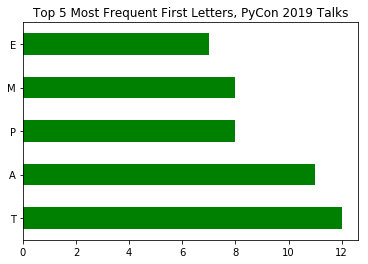

In [0]:
%matplotlib inline
(df['first_letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='green', 
       title='Top 5 Most Frequent First Letters, PyCon 2019 Talks'));

Histogram of title lengths, in characters

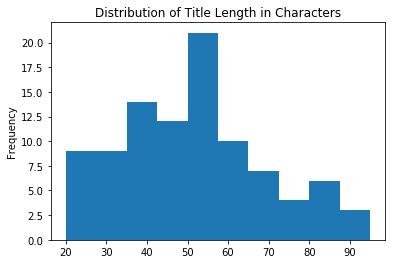

In [0]:
title = 'Distribution of Title Length in Characters'
df['title_char_count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?

In [0]:
descriptions = [tag.text
                .strip()
                .replace('\r\n\r\n', ' ')
                for tag in soup.select('.presentation-description')]
descriptions[:3]

["Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start? BeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper. This talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 'We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what happens, how the descriptor protocol 

In [0]:
df['description'] = descriptions
df['desc_char_count'] = df['description'].apply(len)
df['desc_word_count'] = df['description'].apply(textstat.lexicon_count)
df.head()

,title,title_char_count,long_title,first_letter,title_word_count,description,desc_char_count,desc_word_count
0,5 Steps to Build Python Native GUI Widgets for BeeWare,54,False,5,10,"Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know whe...",760,135
1,8 things that happen at the dot: Attribute Access & Descriptors,64,False,8,10,"We rarely think about the dot “.” between our objects and their fields, but there are quite a lot of things that happen every time we use one in Python. This talk will explore the details of what ...",296,56
2,Account Security Patterns: How Logged-In Are you?,49,False,A,7,"Account security means making sure your users are only ones who can access their accounts. Account takeovers happen for a variety of reasons -- password re-use, compromised computers, guessable pa...",426,66
3,Ace Your Technical Interview Using Python,41,False,A,6,Do you feel overwhelmed by the prospect of having to find a new software engineering job because you dread the technical interviewing process? Have you been putting off submitting your job applica...,504,84
4,Advanced asyncio: Solving Real-world Production Problems,56,False,A,6,"Everyone’s talking about it. Everyone’s using it. But most likely, they’re doing it wrong, just like we did. By building a simplified chaos monkey service, we will walk through how to create a goo...",644,96


In [0]:
df.describe()

,title_char_count,title_word_count,desc_char_count,desc_word_count
count,95.000000,95.000000,95.000000,95.000000
mean,51.347368,7.978947,808.526316,130.821053
std,17.729509,3.218890,412.511969,64.357872
min,20.000000,2.000000,121.000000,20.000000
25%,37.000000,6.000000,539.500000,85.500000
50%,52.000000,7.000000,718.000000,116.000000
75%,62.000000,9.500000,1010.500000,165.000000
max,95.000000,19.000000,2818.000000,421.000000


Average description word count: 130 words

Minimum description word count: 20 words

Maximum description word count: 421 words

In [0]:
# Which descriptions could fit in a tweet? (280 characters)
df[ df['desc_char_count'] <= 280]

,title,title_char_count,long_title,first_letter,title_word_count,description,desc_char_count,desc_word_count
54,"Making Music with Python, SuperCollider and FoxDot",50,False,M,7,"Learn how to make music with Python, SuperCollider and FoxDot. We'll create a song together in this live coded adventure.",121,20


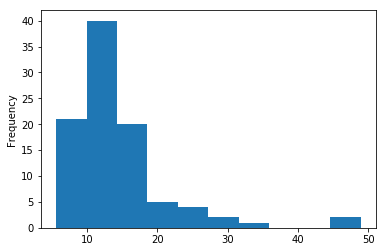

In [0]:
df['flesch_kincaid'] = [textstat.flesch_kincaid_grade(item) for item in descriptions]
df['flesch_kincaid'].plot.hist();